## Part I: Data Analysis & Preprocessing [10 points]

In [92]:
import pandas as pd
import numpy as np

In [93]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 15)
df=pd.read_csv('Data/noisy_datasets/penguins.csv')
df

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.1,18.7,181.0,3750.0,male,2007.0
1,Adelie,Torgersen,4890,14,39.5,17.4,186.0,3800.0,female,2007.0
2,Adelie,Torgersen,7184,11,40.3,18.0,195.0,3250.0,female,2007.0
3,Adelie,Torgersen,4169,8,NaN,NaN,NaN,992.0,NaN,2007.0
4,Adelie,Torgersen,4774,8,36.7,19.3,193.0,3450.0,female,2007.0
...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,4826,11,55.8,19.8,207.0,4000.0,male,2009.0
340,Chinstrap,Dream,4111,9,43.5,18.1,202.0,3400.0,female,2009.0
341,Chinstrap,Dream,7049,10,49.6,18.2,193.0,3775.0,male,2009.0
342,Chinstrap,Dream,4705,7,50.8,19.0,210.0,4100.0,male,2009.0


In [94]:
df.describe()

,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,344.000000,337.000000,333.000000,336.000000,339.000000,342.000000
mean,5270.002907,10.447674,45.494214,18.018318,197.764881,4175.463127,2008.035088
std,1067.959116,2.265895,10.815787,9.241384,27.764491,858.713267,0.816938
min,3504.000000,7.000000,32.100000,13.100000,10.000000,882.000000,2007.000000
25%,4403.000000,9.000000,39.500000,15.700000,190.000000,3550.000000,2007.000000
50%,5106.500000,10.000000,45.100000,17.300000,197.000000,4050.000000,2008.000000
75%,6212.750000,12.000000,49.000000,18.700000,213.000000,4750.000000,2009.000000
max,7197.000000,14.000000,124.300000,127.260000,231.000000,6300.000000,2009.000000


In [95]:
df.shape

(344, 10)

In [96]:
#finds columns with null values
df.isna().sum()

species                   11
island                    10
calorie requirement        0
average sleep duration     0
bill_length_mm             7
bill_depth_mm             11
flipper_length_mm          8
body_mass_g                5
gender                    17
year                       2
dtype: int64

In [97]:
df['species']=df['species'].fillna(df['species'].mode()[0])
df['island']=df['island'].fillna(df['island'].mode()[0])
df['gender']=df['gender'].fillna(df['gender'].mode()[0])
df['bill_length_mm']=df['bill_length_mm'].fillna(df['bill_length_mm'].mean())
df['bill_depth_mm']=df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean())
df['flipper_length_mm']=df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['body_mass_g']=df['body_mass_g'].fillna(df['body_mass_g'].median())
df['year']=df['year'].fillna(df['year'].mode()[0])
df.isna().sum()

species                   0
island                    0
calorie requirement       0
average sleep duration    0
bill_length_mm            0
bill_depth_mm             0
flipper_length_mm         0
body_mass_g               0
gender                    0
year                      0
dtype: int64

In [98]:
def standardize(value):
    return value.capitalize()
df['species']=df['species'].apply(standardize)
df['island']=df['island'].apply(standardize)
df['gender']=df['gender'].apply(standardize)

In [99]:
df

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.100000,18.700000,181.000000,3750.0,Male,2007.0
1,Adelie,Torgersen,4890,14,39.500000,17.400000,186.000000,3800.0,Female,2007.0
2,Adelie,Torgersen,7184,11,40.300000,18.000000,195.000000,3250.0,Female,2007.0
3,Adelie,Torgersen,4169,8,45.494214,18.018318,197.764881,992.0,Male,2007.0
4,Adelie,Torgersen,4774,8,36.700000,19.300000,193.000000,3450.0,Female,2007.0
...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,4826,11,55.800000,19.800000,207.000000,4000.0,Male,2009.0
340,Chinstrap,Dream,4111,9,43.500000,18.100000,202.000000,3400.0,Female,2009.0
341,Chinstrap,Dream,7049,10,49.600000,18.200000,193.000000,3775.0,Male,2009.0
342,Chinstrap,Dream,4705,7,50.800000,19.000000,210.000000,4100.0,Male,2009.0


In [100]:
columns=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
def impute_outlier(df, column):
    impute_column = df[column]
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    non_outlier_median = impute_column[(df[column] >= lower_bound) & (df[column] <= upper_bound)].median()

    def impute_value(value):
        if value < lower_bound or value > upper_bound:
            return non_outlier_median
        else:
            return value

    df[column] = df[column].apply(impute_value)

for column in columns:
    impute_outlier(df, column)

df

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.100000,18.700000,181.000000,3750.0,Male,2007.0
1,Adelie,Torgersen,4890,14,39.500000,17.400000,186.000000,3800.0,Female,2007.0
2,Adelie,Torgersen,7184,11,40.300000,18.000000,195.000000,3250.0,Female,2007.0
3,Adelie,Torgersen,4169,8,45.494214,18.018318,197.764881,4050.0,Male,2007.0
4,Adelie,Torgersen,4774,8,36.700000,19.300000,193.000000,3450.0,Female,2007.0
...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,4826,11,55.800000,19.800000,207.000000,4000.0,Male,2009.0
340,Chinstrap,Dream,4111,9,43.500000,18.100000,202.000000,3400.0,Female,2009.0
341,Chinstrap,Dream,7049,10,49.600000,18.200000,193.000000,3775.0,Male,2009.0
342,Chinstrap,Dream,4705,7,50.800000,19.000000,210.000000,4100.0,Male,2009.0


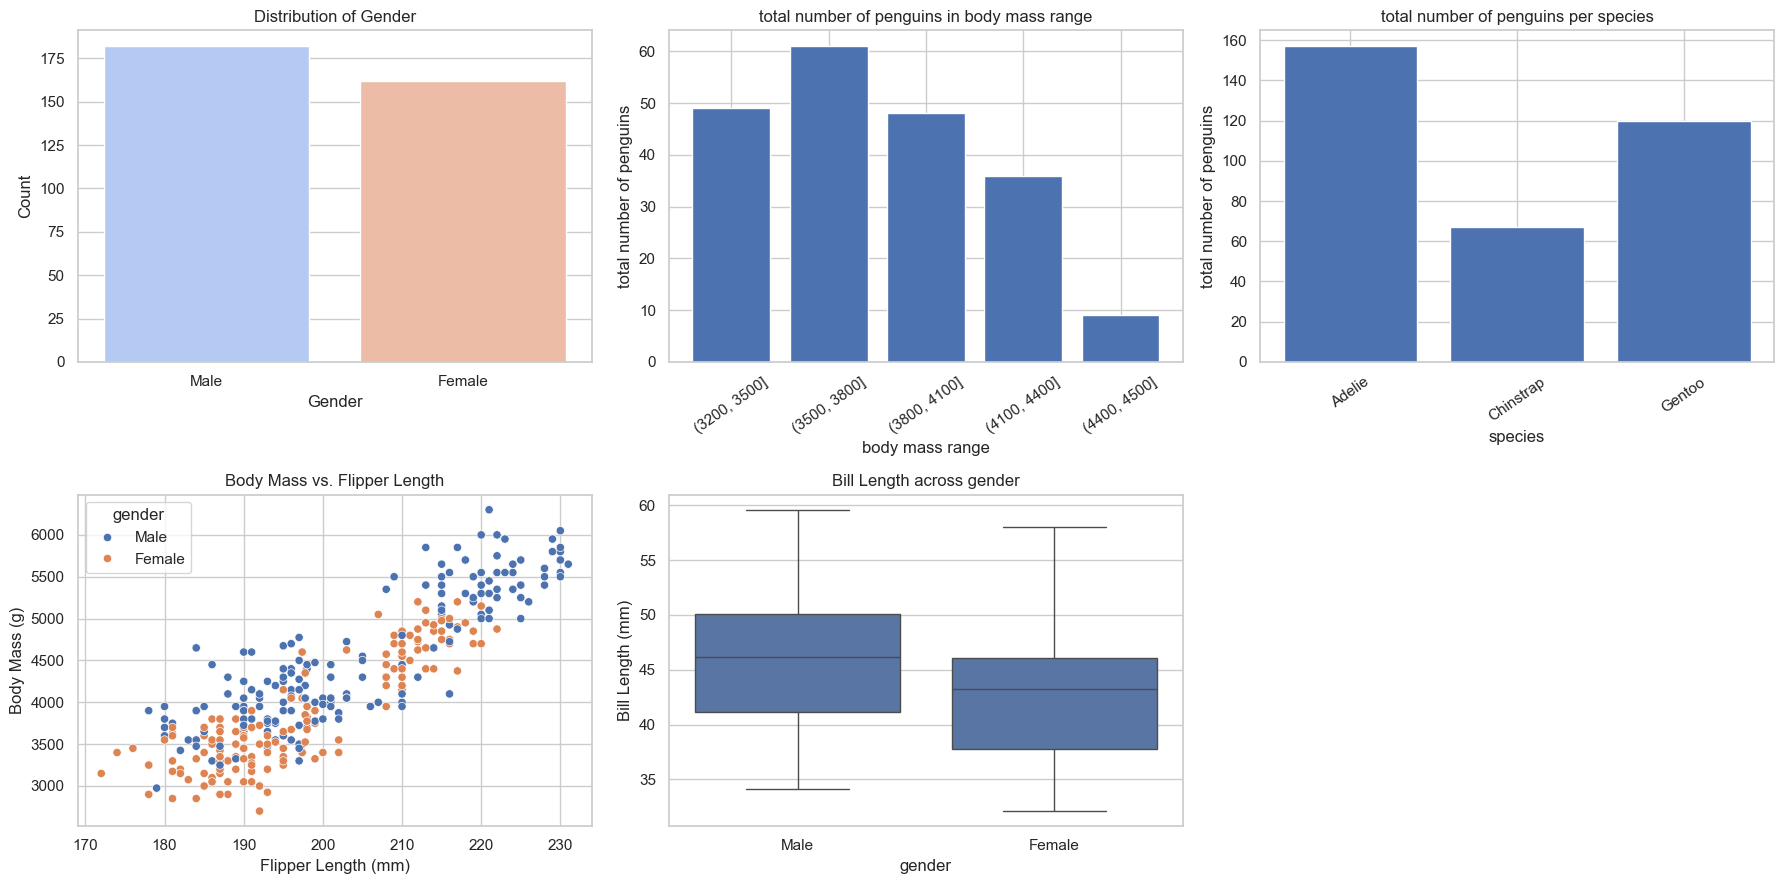

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.figure(figsize=(18, 9))


plt.subplot(2, 3, 1)
sns.countplot(x='gender', data=df, hue='gender', palette="coolwarm")
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')


plt.subplot(2, 3, 2)
filtdf=df[(df['body_mass_g']>3200) & (df['body_mass_g']<=4500)].copy()
filtdf['body_mass_g_range']=pd.cut(filtdf['body_mass_g'],bins=[3200, 3500, 3800, 4100, 4400, 4500])
filt=filtdf.groupby(['body_mass_g_range'],observed=False).size()
plt.bar(filt.index.astype(str),filt.values)
plt.title('total number of penguins in body mass range')
plt.xlabel('body mass range')
plt.ylabel('total number of penguins')
plt.xticks(rotation=35)


plt.subplot(2, 3, 3)
grpSpecies=df.groupby(['species'])['island'].count()
plt.bar(grpSpecies.index,grpSpecies.values)
plt.title('total number of penguins per species')
plt.xlabel('species')
plt.ylabel('total number of penguins')
plt.xticks(rotation=35)


plt.subplot(2, 3, 4)
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='gender', data=df)
plt.title('Body Mass vs. Flipper Length')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')


plt.subplot(2, 3, 5)
sns.boxplot(x='gender', y='bill_length_mm', data=df)
plt.title('Bill Length across gender')
plt.xlabel('gender')
plt.ylabel('Bill Length (mm)')

plt.tight_layout()
plt.show()
# END YOUR CODE

In [102]:
def normalize(df,column):
    column_min = df[column].min()
    column_max = df[column].max()
    print("Minimum value for ",column," is: ",column_min)
    print("Maximum value for ",column," is: ",column_max)
    df[column] = (df[column] - column_min) / (column_max - column_min)

columns=['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g','calorie requirement']
for column in columns:
    normalize(df,column)
df

Minimum value for  bill_length_mm  is:  32.1
Maximum value for  bill_length_mm  is:  59.6
Minimum value for  bill_depth_mm  is:  13.1
Maximum value for  bill_depth_mm  is:  21.5
Minimum value for  flipper_length_mm  is:  172.0
Maximum value for  flipper_length_mm  is:  231.0
Minimum value for  body_mass_g  is:  2700.0
Maximum value for  body_mass_g  is:  6300.0
Minimum value for  calorie requirement  is:  3504
Maximum value for  calorie requirement  is:  7197


,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,0.828324,11,0.254545,0.666667,0.152542,0.291667,Male,2007.0
1,Adelie,Torgersen,0.375305,14,0.269091,0.511905,0.237288,0.305556,Female,2007.0
2,Adelie,Torgersen,0.996480,11,0.298182,0.583333,0.389831,0.152778,Female,2007.0
3,Adelie,Torgersen,0.180070,8,0.487062,0.585514,0.436693,0.375000,Male,2007.0
4,Adelie,Torgersen,0.343894,8,0.167273,0.738095,0.355932,0.208333,Female,2007.0
...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,0.357975,11,0.861818,0.797619,0.593220,0.361111,Male,2009.0
340,Chinstrap,Dream,0.164365,9,0.414545,0.595238,0.508475,0.194444,Female,2009.0
341,Chinstrap,Dream,0.959924,10,0.636364,0.607143,0.355932,0.298611,Male,2009.0
342,Chinstrap,Dream,0.325210,7,0.680000,0.702381,0.644068,0.388889,Male,2009.0


In [103]:
df['species']=pd.Categorical(df['species']).codes
df['island']=pd.Categorical(df['island']).codes
df['gender']=pd.Categorical(df['gender']).codes
df.corr()


,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
species,1.000000,-0.599311,-0.013699,0.022446,0.694467,-0.687255,0.815523,0.714814,0.010300,0.037981
island,-0.599311,1.000000,-0.025348,-0.007943,-0.333589,0.529162,-0.537636,-0.536796,-0.003172,-0.102738
calorie requirement,-0.013699,-0.025348,1.000000,-0.055628,-0.012557,-0.085828,0.004400,0.041276,-0.013366,-0.013609
average sleep duration,0.022446,-0.007943,-0.055628,1.000000,0.048503,-0.013193,0.082667,0.078071,0.045104,0.037336
bill_length_mm,0.694467,-0.333589,-0.012557,0.048503,1.000000,-0.205024,0.648703,0.585043,0.332281,0.070062
bill_depth_mm,-0.687255,0.529162,-0.085828,-0.013193,-0.205024,1.000000,-0.556658,-0.455343,0.352013,-0.078537
flipper_length_mm,0.815523,-0.537636,0.004400,0.082667,0.648703,-0.556658,1.000000,0.867416,0.247712,0.176444
body_mass_g,0.714814,-0.536796,0.041276,0.078071,0.585043,-0.455343,0.867416,1.000000,0.407906,0.054785
gender,0.010300,-0.003172,-0.013366,0.045104,0.332281,0.352013,0.247712,0.407906,1.000000,-0.017165
year,0.037981,-0.102738,-0.013609,0.037336,0.070062,-0.078537,0.176444,0.054785,-0.017165,1.000000


In [104]:
df.to_csv('penguins_preprocessed.csv', sep=',', encoding='utf-8')

In [105]:
# pd.set_option('future.no_silent_downcasting', True)
# columns = ['species', 'island', 'gender']
# df_encoded = pd.get_dummies(df[columns])
# df = pd.concat([df, df_encoded], axis=1)
# df.replace({True: 1, False: 0}, inplace=True)
# df

In [106]:
# df.to_csv('sampledata', sep='\t', encoding='utf-8')

# df_non_categorical=df.drop(columns=['gender', 'species', 'island'])
# df_non_categorical.corr()

# Part I: Data Analysis & Preprocessing [10 points] - Diamond dataset

In [107]:
import pandas as pd
import numpy as np

In [108]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 15)
diamond_df = pd.read_csv('Data/noisy_datasets/diamond.csv', skipinitialspace=True, na_values=['FALSE', 'TRUE', 'MAYBE','IF','if'])
diamond_df.drop('Unnamed: 0',axis=1,inplace=True)
diamond_df.head(15)

,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,31282,5.01,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,40049,1.69,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,33517,3.85,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,38495,3.49,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,34178,4.70,63.3,58.0,335.0,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,44700,0.86,62.8,57.0,336.0,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,42939,1.68,62.3,57.0,336.0,3.95,3.98,2.47
7,NaN,NaN,H,SI1,37587,4.62,NaN,NaN,NaN,4.07,4.11,2.53
8,0.22,Fair,E,VS2,30454,4.02,65.1,61.0,337.0,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,45506,1.20,59.4,61.0,338.0,4.00,4.05,2.39


In [109]:
diamond_df.describe()

,carat,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
count,51073.000000,53940.000000,53940.000000,51866.000000,51030.000000,51844.000000,51027.000000,52208.000000,51532.000000
mean,0.797823,39521.990100,2.902669,61.750175,57.456332,3933.022047,5.731451,5.734517,3.538203
std,0.473747,5486.892971,1.325985,1.433485,2.231611,3989.013631,1.121433,1.142543,0.706057
min,0.200000,30000.000000,0.600000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,34780.000000,1.750000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,39547.500000,2.910000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,44252.000000,4.050000,62.500000,59.000000,5327.250000,6.540000,6.540000,4.030000
max,5.010000,48999.000000,5.200000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [110]:
diamond_df.shape

(53940, 12)

In [111]:
diamond_df.isna().sum()

carat                                  2867
cut                                    2682
color                                  2890
clarity                                3472
average us salary                         0
number of diamonds mined (millions)       0
depth                                  2074
table                                  2910
price                                  2096
x                                      2913
y                                      1732
z                                      2408
dtype: int64

In [112]:
diamond_df['cut']=diamond_df['cut'].fillna(diamond_df['cut'].mode()[0])
diamond_df['color']=diamond_df['color'].fillna(diamond_df['color'].mode()[0])
diamond_df['clarity']=diamond_df['clarity'].fillna(diamond_df['clarity'].mode()[0])
diamond_df['carat']=diamond_df['carat'].fillna(diamond_df['carat'].median())
diamond_df['depth']=diamond_df['depth'].fillna(diamond_df['depth'].median())
diamond_df['table']=diamond_df['table'].fillna(diamond_df['table'].median())
diamond_df['price']=diamond_df['price'].fillna(diamond_df['price'].median())
diamond_df['x']=diamond_df['x'].fillna(diamond_df['x'].median())
diamond_df['y']=diamond_df['y'].fillna(diamond_df['y'].median())
diamond_df['z']=diamond_df['z'].fillna(diamond_df['z'].median())
diamond_df.isna().sum()

carat                                  0
cut                                    0
color                                  0
clarity                                0
average us salary                      0
number of diamonds mined (millions)    0
depth                                  0
table                                  0
price                                  0
x                                      0
y                                      0
z                                      0
dtype: int64

In [113]:
def upperCase(value):
    return value.upper()
def lowerCase(value):
    return value.lower()
diamond_df['cut']=diamond_df['cut'].apply(lowerCase)
diamond_df['color']=diamond_df['color'].apply(upperCase)
diamond_df['clarity']=diamond_df['clarity'].apply(upperCase)
diamond_df

,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,0.23,ideal,E,SI2,31282,5.01,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,premium,E,SI1,40049,1.69,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,good,E,VS1,33517,3.85,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,premium,I,VS2,38495,3.49,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,good,J,SI2,34178,4.70,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,ideal,D,SI1,43892,3.54,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,good,D,SI1,35532,3.51,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,very good,D,SI1,32133,3.27,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,premium,H,SI2,44248,4.03,61.0,58.0,2757.0,6.15,6.12,3.74


In [114]:
columns=['carat','average us salary','number of diamonds mined (millions)','depth','x','y','z']
def impute_outlier(diamond_df, column):
    impute_column = diamond_df[column]
    q1 = diamond_df[column].quantile(0.25)
    q3 = diamond_df[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    non_outlier_median = impute_column[(diamond_df[column] >= lower_bound) & (diamond_df[column] <= upper_bound)].median()

    def impute_value(value):
        if value < lower_bound or value > upper_bound:
            return non_outlier_median
        else:
            return value

    diamond_df[column] = diamond_df[column].apply(impute_value)

for column in columns:
    impute_outlier(diamond_df, column)

diamond_df

,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,0.23,ideal,E,SI2,31282,5.01,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,premium,E,SI1,40049,1.69,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,good,E,VS1,33517,3.85,61.8,65.0,327.0,4.05,4.07,2.31
3,0.29,premium,I,VS2,38495,3.49,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,good,J,SI2,34178,4.70,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,ideal,D,SI1,43892,3.54,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,good,D,SI1,35532,3.51,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,very good,D,SI1,32133,3.27,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,premium,H,SI2,44248,4.03,61.0,58.0,2757.0,6.15,6.12,3.74


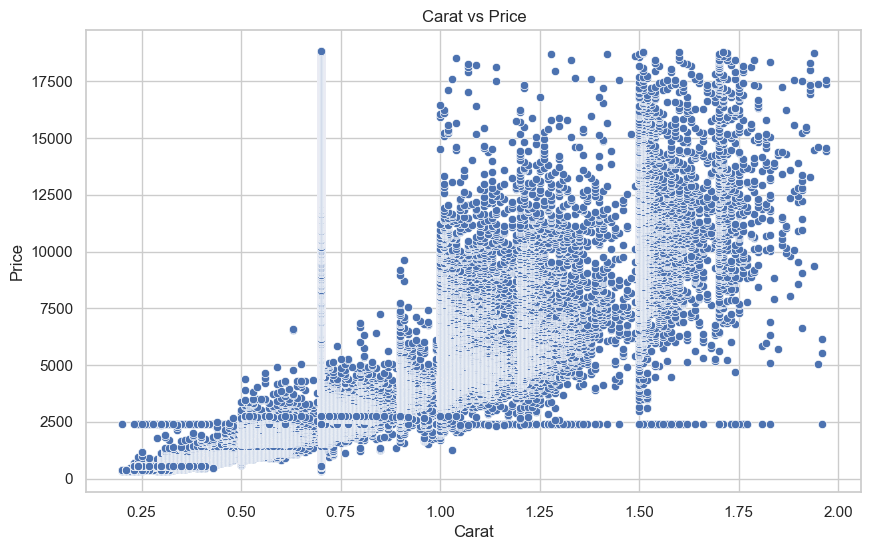

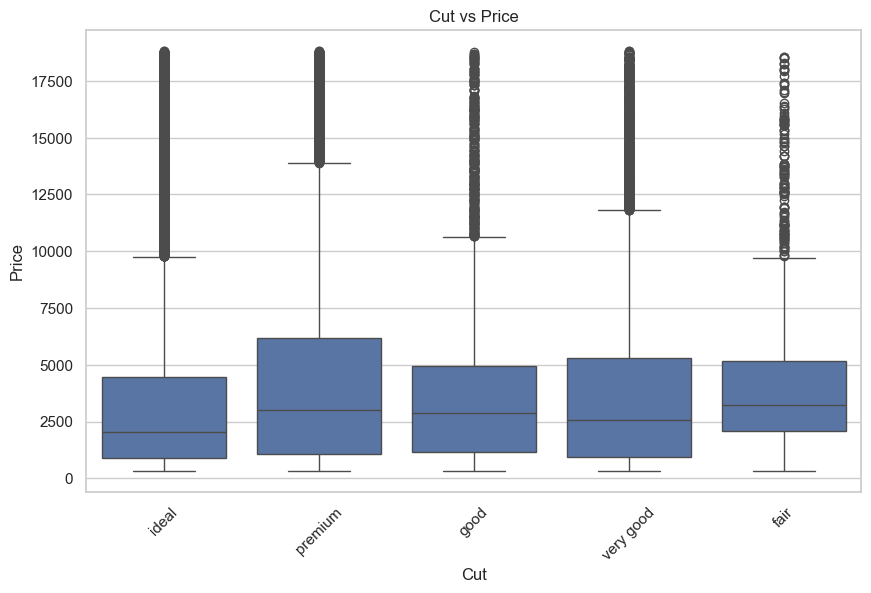

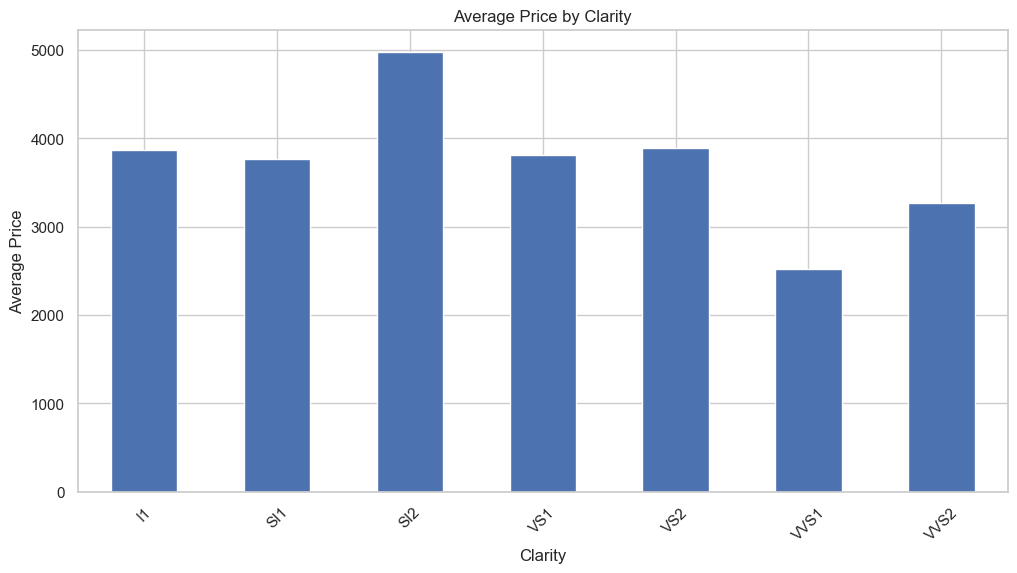

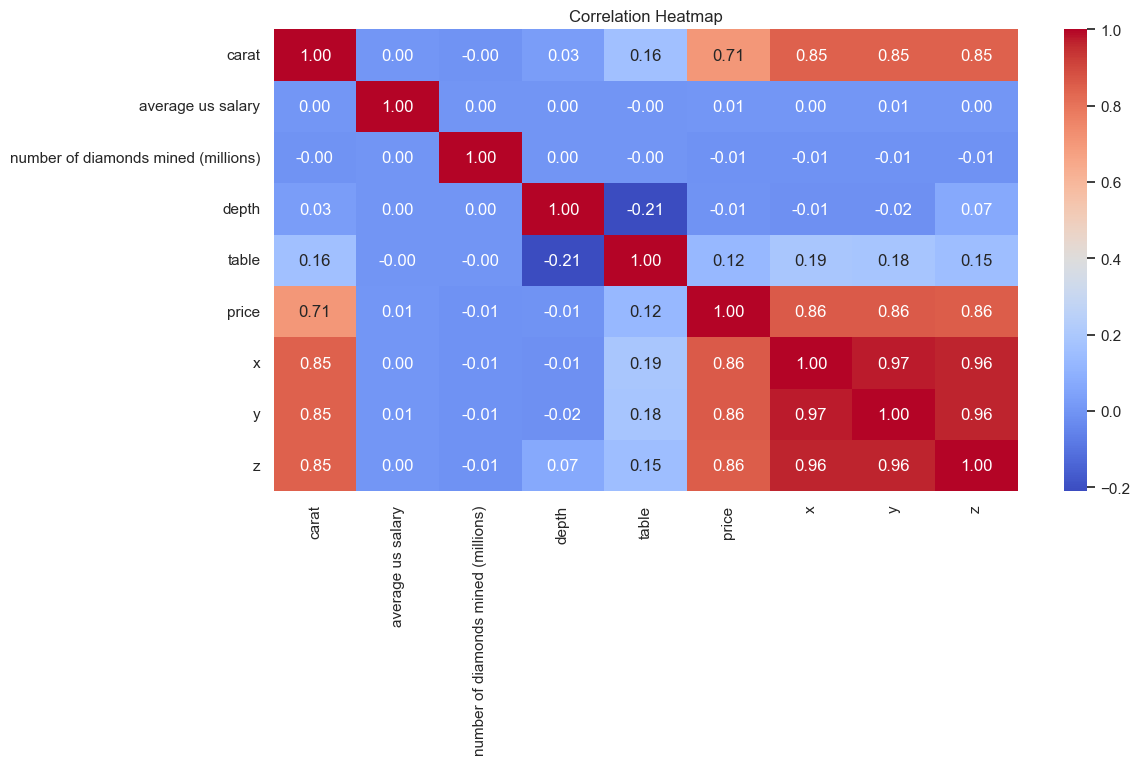

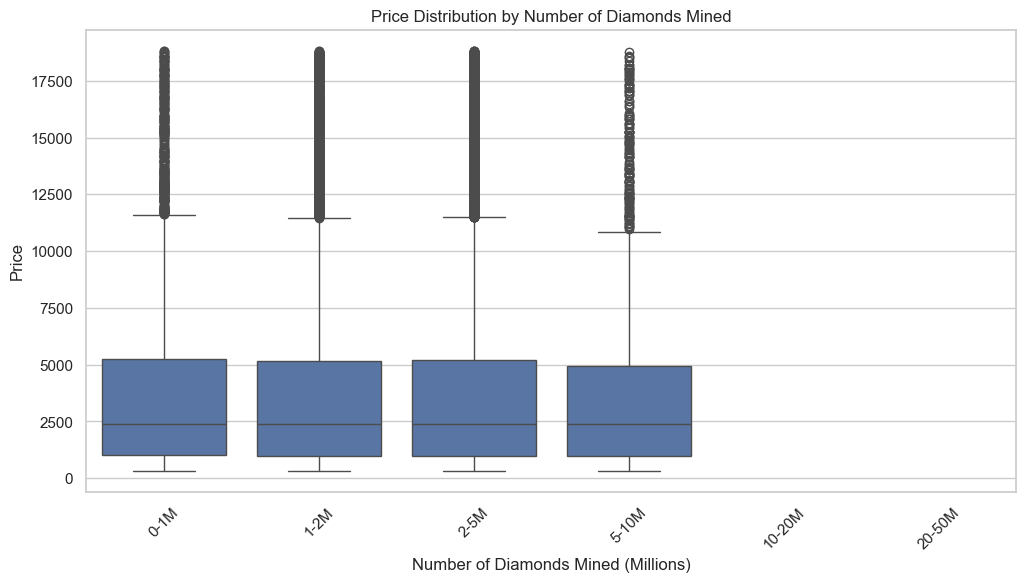

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', data=diamond_df)
plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='cut', y='price', data=diamond_df)
plt.title('Cut vs Price')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 6))
diamond_df.groupby('clarity')['price'].mean().plot(kind='bar')
plt.title('Average Price by Clarity')
plt.xlabel('Clarity')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 6))
corr = diamond_df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=pd.cut(diamond_df['number of diamonds mined (millions)'], bins=bins, labels=labels), y='price', data=diamond_df)
plt.title('Price Distribution by Number of Diamonds Mined')
plt.xlabel('Number of Diamonds Mined (Millions)')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


In [116]:
diamond_df

,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,0.23,ideal,E,SI2,31282,5.01,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,premium,E,SI1,40049,1.69,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,good,E,VS1,33517,3.85,61.8,65.0,327.0,4.05,4.07,2.31
3,0.29,premium,I,VS2,38495,3.49,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,good,J,SI2,34178,4.70,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,ideal,D,SI1,43892,3.54,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,good,D,SI1,35532,3.51,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,very good,D,SI1,32133,3.27,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,premium,H,SI2,44248,4.03,61.0,58.0,2757.0,6.15,6.12,3.74


In [117]:
def normalize(diamond_df,column):
    column_min = diamond_df[column].min()
    column_max = diamond_df[column].max()
    print("Minimum value for ",column," is: ",column_min)
    print("Maximum value for ",column," is: ",column_max)
    diamond_df[column] = (diamond_df[column] - column_min) / (column_max - column_min)

columns=['carat','average us salary','number of diamonds mined (millions)','depth','table','x','y','z']
for column in columns:
    normalize(diamond_df,column)
diamond_df

Minimum value for  carat  is:  0.2
Maximum value for  carat  is:  1.97
Minimum value for  average us salary  is:  30000
Maximum value for  average us salary  is:  48999
Minimum value for  number of diamonds mined (millions)  is:  0.6
Maximum value for  number of diamonds mined (millions)  is:  5.2
Minimum value for  depth  is:  59.0
Maximum value for  depth  is:  64.6
Minimum value for  table  is:  43.0
Maximum value for  table  is:  95.0
Minimum value for  x  is:  3.73
Maximum value for  x  is:  9.14
Minimum value for  y  is:  3.68
Maximum value for  y  is:  9.14
Minimum value for  z  is:  1.41
Maximum value for  z  is:  5.65


,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,0.016949,ideal,E,SI2,0.067477,0.958696,0.446429,0.230769,326.0,0.040665,0.054945,0.240566
1,0.005650,premium,E,SI1,0.528923,0.236957,0.142857,0.346154,326.0,0.029575,0.029304,0.212264
2,0.016949,good,E,VS1,0.185115,0.706522,0.500000,0.423077,327.0,0.059150,0.071429,0.212264
3,0.050847,premium,I,VS2,0.447129,0.628261,0.607143,0.288462,334.0,0.086876,0.100733,0.287736
4,0.062147,good,J,SI2,0.219906,0.891304,0.767857,0.288462,335.0,0.112754,0.122711,0.316038
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.293785,ideal,D,SI1,0.731196,0.639130,0.321429,0.269231,2757.0,0.373383,0.380952,0.492925
53936,0.293785,good,D,SI1,0.291173,0.632609,0.732143,0.230769,2757.0,0.362292,0.379121,0.518868
53937,0.282486,very good,D,SI1,0.112269,0.580435,0.678571,0.326923,2757.0,0.356747,0.366300,0.507075
53938,0.372881,premium,H,SI2,0.749934,0.745652,0.357143,0.288462,2757.0,0.447320,0.446886,0.549528


In [118]:
diamond_df['cut']=pd.Categorical(diamond_df['cut']).codes
diamond_df['color']=pd.Categorical(diamond_df['color']).codes
diamond_df['clarity']=pd.Categorical(diamond_df['clarity']).codes
diamond_df.corr()

,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
carat,1.000000,0.024832,0.211718,-0.186297,0.003649,-0.004406,0.026103,0.161990,0.706193,0.845489,0.845637,0.846510
cut,0.024832,1.000000,-0.005366,0.028043,0.001916,0.001913,-0.133338,0.150839,0.042656,0.022190,0.028400,0.002304
color,0.211718,-0.005366,1.000000,-0.026672,-0.003647,-0.004855,0.035567,0.024448,0.165009,0.261798,0.261676,0.264009
clarity,-0.186297,0.028043,-0.026672,1.000000,-0.001962,0.002471,-0.047676,-0.089044,-0.070300,-0.230074,-0.228355,-0.232558
average us salary,0.003649,0.001916,-0.003647,-0.001962,1.000000,0.001257,0.000667,-0.000869,0.005170,0.004064,0.005448,0.004467
number of diamonds mined (millions),-0.004406,0.001913,-0.004855,0.002471,0.001257,1.000000,0.001236,-0.002180,-0.011318,-0.009168,-0.008896,-0.010068
depth,0.026103,-0.133338,0.035567,-0.047676,0.000667,0.001236,1.000000,-0.211342,-0.005320,-0.014236,-0.016379,0.070859
table,0.161990,0.150839,0.024448,-0.089044,-0.000869,-0.002180,-0.211342,1.000000,0.124689,0.190204,0.183026,0.151148
price,0.706193,0.042656,0.165009,-0.070300,0.005170,-0.011318,-0.005320,0.124689,1.000000,0.859764,0.862742,0.855815
x,0.845489,0.022190,0.261798,-0.230074,0.004064,-0.009168,-0.014236,0.190204,0.859764,1.000000,0.972227,0.963913


In [119]:
diamond_df.to_csv('diamond_preprocessed.csv', sep=',', encoding='utf-8')